In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# Organize data into train, valid, test dirs
os.chdir('data.au/tc-ts')
if os.path.isdir('train/TC') is False:
    os.makedirs('train/TC')
    os.makedirs('train/TS')
    os.makedirs('valid/TC')
    os.makedirs('valid/TS')
    os.makedirs('test/TC')
    os.makedirs('test/TS')

    for i in random.sample(glob.glob('TSImages/*.png'), 150):
        shutil.move(i , 'train/TS')      
    for i in random.sample(glob.glob('TCImages/*.png'), 200):
        shutil.move(i , 'train/TC')
    for i in random.sample(glob.glob('TSImages/*.png'), 40):
        shutil.move(i , 'valid/TS')        
    for i in random.sample(glob.glob('TCImages/*.png'), 80):
        shutil.move(i , 'valid/TC')
    for i in random.sample(glob.glob('TSImages/*.png'), 29):
        shutil.move(i , 'test/TS')      
    for i in random.sample(glob.glob('TCImages/*.png'), 48):
        shutil.move(i , 'test/TC')

os.chdir('../../')

In [22]:
train_path = 'data.aug/tc-ts/train'
valid_path = 'data.aug/tc-ts/valid'
test_path = 'data.aug/tc-ts/test'

In [27]:

train_batches = ImageDataGenerator() \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=['TS', 'TC'], batch_size=10)
valid_batches = ImageDataGenerator() \
    .flow_from_directory(directory=valid_path, target_size=(100,100), classes=['TS', 'TC'], batch_size=10)
test_batches = ImageDataGenerator() \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=['TS', 'TC'], batch_size=10, shuffle=False)

Found 350 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [28]:
imgs, labels = next(train_batches)

In [29]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

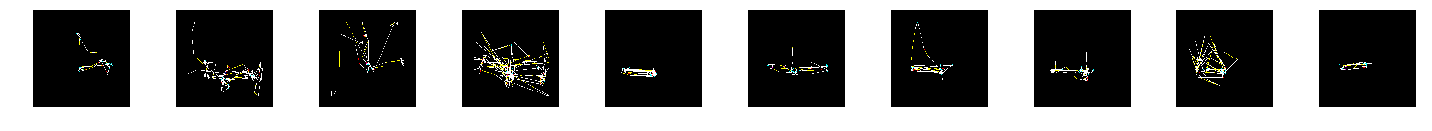

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [30]:
plotImages(imgs)
print(labels)

In [31]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [32]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 80002     
Total params: 99,394
Trainable params: 99,394
Non-trainable params: 0
____________________________________________________

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
35/35 - 15s - loss: 1.0875 - accuracy: 0.5714 - val_loss: 0.9264 - val_accuracy: 0.6167
Epoch 2/10
35/35 - 7s - loss: 0.6556 - accuracy: 0.7114 - val_loss: 0.5769 - val_accuracy: 0.7417
Epoch 3/10
35/35 - 7s - loss: 0.3577 - accuracy: 0.8457 - val_loss: 0.5852 - val_accuracy: 0.7500
Epoch 4/10
35/35 - 6s - loss: 0.2595 - accuracy: 0.9143 - val_loss: 0.6343 - val_accuracy: 0.7250
Epoch 5/10
35/35 - 6s - loss: 0.2115 - accuracy: 0.9514 - val_loss: 0.6032 - val_accuracy: 0.7417
Epoch 6/10
35/35 - 7s - loss: 0.1679 - accuracy: 0.9629 - val_loss: 0.6785 - val_accuracy: 0.7417
Epoch 7/10
35/35 - 6s - loss: 0.1341 - accuracy: 0.9857 - val_loss: 0.6851 - val_accuracy: 0.7333
Epoch 8/10
35/35 - 7s - loss: 0.1059 - accuracy: 0.9886 - val_loss: 0.7235 - val_accuracy: 0.7250
Epoch 9/10
35/35 - 6s - loss: 0.0906 - accuracy: 0.9971 - val_loss: 0.7520 - val_accuracy: 0.7250
Epoch 10/10
35/35 - 6s - loss: 0.0686 - accuracy: 1.0000 - val_loss: 0.7553 - val_accuracy: 0.7333
